## 1 - Packages

Let's first import all the packages that you will need during this assignment. 
- [numpy](www.numpy.org) is the main package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a library to plot graphs in Python.
- dnn_utils provides some necessary functions for this notebook.
- testCases provides some test cases to assess the correctness of your functions
- np.random.seed(1) is used to keep all the random function calls consistent. It will help us grade your work. Please don't change the seed. 

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.python.framework import ops
import math
import matplotlib.pyplot as plt
import scipy

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

print("TensorFlow version: {}".format(tf.__version__))
print("Eager execution: {}".format(tf.executing_eagerly()))
print("scipy version: {}".format(scipy.__version__))   

TensorFlow version: 2.1.0
Eager execution: True
scipy version: 1.4.1


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Dropout
from tensorflow.keras import regularizers

In [4]:
# Build the Sequential feedforward neural network model
def get_regularised_model(lmba=0.0, rate=0.0):
    model = Sequential([
        InputLayer(input_shape=(12288,)),
        Dropout(rate),
        Dense(20,activation='relu',   kernel_initializer='he_normal',   bias_initializer='zeros', kernel_regularizer=tf.keras.regularizers.l2(lmba/2.0), name='l1'),
        Dropout(rate),
        Dense(7, activation='relu',   kernel_initializer='he_normal',   bias_initializer='zeros', kernel_regularizer=tf.keras.regularizers.l2(lmba/2.0), name='l2'),
        Dropout(rate),
        Dense(5, activation='relu',   kernel_initializer='he_normal',   bias_initializer='zeros', kernel_regularizer=tf.keras.regularizers.l2(lmba/2.0), name='l3'),
        Dropout(rate),
        Dense(1, activation='sigmoid',kernel_initializer='GlorotNormal',bias_initializer='zeros', kernel_regularizer=tf.keras.regularizers.l2(lmba/2.0), name='l4')],
        name = 'Regularised_model'
    )
    return model

model = get_regularised_model()

In [5]:
model.summary()

Model: "Regularised_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout (Dropout)            (None, 12288)             0         
_________________________________________________________________
l1 (Dense)                   (None, 20)                245780    
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
l2 (Dense)                   (None, 7)                 147       
_________________________________________________________________
dropout_2 (Dropout)          (None, 7)                 0         
_________________________________________________________________
l3 (Dense)                   (None, 5)                 40        
_________________________________________________________________
dropout_3 (Dropout)          (None, 5)           

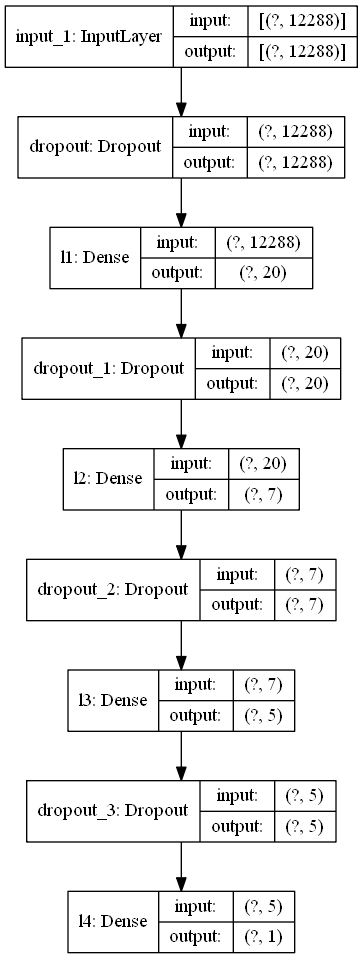

In [6]:
tf.keras.utils.plot_model(
    model, show_shapes=True
)

In [ ]:
for i in range(1000):
    o=yolo_model.get_layer(index=i)
    print(o.output)

In [7]:
config_dict = model.get_config()
print(config_dict)

{'name': 'Regularised_model', 'layers': [{'class_name': 'Dropout', 'config': {'name': 'dropout', 'trainable': True, 'dtype': 'float32', 'rate': 0.0, 'noise_shape': None, 'seed': None, 'batch_input_shape': (None, 12288)}}, {'class_name': 'Dense', 'config': {'name': 'l1', 'trainable': True, 'dtype': 'float32', 'units': 20, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 2.0, 'mode': 'fan_in', 'distribution': 'truncated_normal', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': {'class_name': 'L1L2', 'config': {'l1': 0.0, 'l2': 0.0}}, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}}, {'class_name': 'Dropout', 'config': {'name': 'dropout_1', 'trainable': True, 'dtype': 'float32', 'rate': 0.0, 'noise_shape': None, 'seed': None}}, {'class_name': 'Dense', 'config': {'name': 'l2', 'trainable': True, 'dtype': 'float32', 'u

In [10]:
import json

json_string = model.to_json()
print(json_string)
# Write out JSON config file

with open('config.json', 'w') as f:
    json.dump(json_string, f)
del json_string


{"class_name": "Sequential", "config": {"name": "Regularised_model", "layers": [{"class_name": "Dropout", "config": {"name": "dropout", "trainable": true, "dtype": "float32", "rate": 0.0, "noise_shape": null, "seed": null, "batch_input_shape": [null, 12288]}}, {"class_name": "Dense", "config": {"name": "l1", "trainable": true, "dtype": "float32", "units": 20, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"scale": 2.0, "mode": "fan_in", "distribution": "truncated_normal", "seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": {"class_name": "L1L2", "config": {"l1": 0.0, "l2": 0.0}}, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dropout", "config": {"name": "dropout_1", "trainable": true, "dtype": "float32", "rate": 0.0, "noise_shape": null, "seed": null}}, {"class_name": "Dense", "config": {"name": "l2", "t

In [12]:
# Read in JSON config file again

with open('config.json', 'r') as f:
    json_string = json.load(f)
print(json_string)    

{"class_name": "Sequential", "config": {"name": "Regularised_model", "layers": [{"class_name": "Dropout", "config": {"name": "dropout", "trainable": true, "dtype": "float32", "rate": 0.0, "noise_shape": null, "seed": null, "batch_input_shape": [null, 12288]}}, {"class_name": "Dense", "config": {"name": "l1", "trainable": true, "dtype": "float32", "units": 20, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"scale": 2.0, "mode": "fan_in", "distribution": "truncated_normal", "seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": {"class_name": "L1L2", "config": {"l1": 0.0, "l2": 0.0}}, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dropout", "config": {"name": "dropout_1", "trainable": true, "dtype": "float32", "rate": 0.0, "noise_shape": null, "seed": null}}, {"class_name": "Dense", "config": {"name": "l2", "t

In [40]:
model.compile (
#    optimizer=tf.keras.optimizers.SGD(learning_rate=0.0075),
    optimizer=tf.keras.optimizers.Adam(),
    loss= tf.keras.losses.BinaryCrossentropy(),
    metrics= [tf.keras.metrics.BinaryAccuracy()]
)

In [41]:
import h5py
def load_data_new():
    train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
    print(train_dataset.keys())
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
    print(test_dataset.keys())
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [42]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data_new()

<KeysViewHDF5 ['list_classes', 'train_set_x', 'train_set_y']>
<KeysViewHDF5 ['list_classes', 'test_set_x', 'test_set_y']>


y = 1. It's a cat picture.


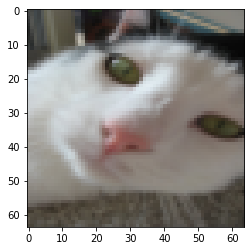

In [43]:
# Example of a picture
index = 14
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

In [44]:
# Explore your dataset 
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)


In [45]:
# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1)  # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1)

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

train_y = train_y.T
test_y = test_y.T
print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))
print ("train_y's shape: " + str(train_y.shape))
print ("test_y's shape: " + str(test_y.shape))

train_x's shape: (209, 12288)
test_x's shape: (50, 12288)
train_y's shape: (209, 1)
test_y's shape: (50, 1)


In [46]:
# Fit the model
history=model.fit(train_x,train_y ,epochs= 1000, batch_size =32, validation_split=0.15)

Train on 177 samples, validate on 32 samples
Epoch 1/1000
177/177 [==============================] - 0s 2ms/sample - loss: 0.8498 - binary_accuracy: 0.3672 - val_loss: 0.7404 - val_binary_accuracy: 0.2188
Epoch 2/1000
177/177 [==============================] - 0s 280us/sample - loss: 0.7287 - binary_accuracy: 0.3672 - val_loss: 0.7561 - val_binary_accuracy: 0.2188
Epoch 3/1000
177/177 [==============================] - 0s 293us/sample - loss: 0.7177 - binary_accuracy: 0.3672 - val_loss: 0.7204 - val_binary_accuracy: 0.3125
Epoch 4/1000
177/177 [==============================] - 0s 298us/sample - loss: 0.6978 - binary_accuracy: 0.3503 - val_loss: 0.6927 - val_binary_accuracy: 0.4688
Epoch 5/1000
177/177 [==============================] - 0s 293us/sample - loss: 0.6891 - binary_accuracy: 0.6441 - val_loss: 0.7019 - val_binary_accuracy: 0.6562
Epoch 6/1000
177/177 [==============================] - 0s 270us/sample - loss: 0.6893 - binary_accuracy: 0.6158 - val_loss: 0.6833 - val_binary_ac

177/177 [==============================] - 0s 287us/sample - loss: 0.5542 - binary_accuracy: 0.6667 - val_loss: 0.6910 - val_binary_accuracy: 0.7500
Epoch 52/1000
177/177 [==============================] - 0s 299us/sample - loss: 0.5206 - binary_accuracy: 0.6780 - val_loss: 0.6925 - val_binary_accuracy: 0.7500
Epoch 53/1000
177/177 [==============================] - 0s 270us/sample - loss: 0.4766 - binary_accuracy: 0.6893 - val_loss: 0.7176 - val_binary_accuracy: 0.5625
Epoch 54/1000
177/177 [==============================] - 0s 276us/sample - loss: 0.4991 - binary_accuracy: 0.7175 - val_loss: 0.6435 - val_binary_accuracy: 0.7500
Epoch 55/1000
177/177 [==============================] - 0s 261us/sample - loss: 0.4652 - binary_accuracy: 0.7175 - val_loss: 0.8847 - val_binary_accuracy: 0.4375
Epoch 56/1000
177/177 [==============================] - 0s 242us/sample - loss: 0.5128 - binary_accuracy: 0.7797 - val_loss: 0.7380 - val_binary_accuracy: 0.7500
Epoch 57/1000
177/177 [=============

177/177 [==============================] - 0s 276us/sample - loss: 0.0223 - binary_accuracy: 1.0000 - val_loss: 1.9193 - val_binary_accuracy: 0.4688
Epoch 152/1000
177/177 [==============================] - 0s 254us/sample - loss: 0.0239 - binary_accuracy: 0.9944 - val_loss: 1.9770 - val_binary_accuracy: 0.5938
Epoch 153/1000
177/177 [==============================] - 0s 282us/sample - loss: 0.0195 - binary_accuracy: 0.9944 - val_loss: 1.9932 - val_binary_accuracy: 0.5938
Epoch 154/1000
177/177 [==============================] - 0s 259us/sample - loss: 0.0163 - binary_accuracy: 1.0000 - val_loss: 1.9429 - val_binary_accuracy: 0.5312
Epoch 155/1000
177/177 [==============================] - 0s 287us/sample - loss: 0.0174 - binary_accuracy: 1.0000 - val_loss: 2.0414 - val_binary_accuracy: 0.5938
Epoch 156/1000
177/177 [==============================] - 0s 282us/sample - loss: 0.0161 - binary_accuracy: 1.0000 - val_loss: 1.9972 - val_binary_accuracy: 0.5625
Epoch 157/1000
177/177 [=======

177/177 [==============================] - 0s 327us/sample - loss: 0.0058 - binary_accuracy: 1.0000 - val_loss: 2.3667 - val_binary_accuracy: 0.5938
Epoch 202/1000
177/177 [==============================] - 0s 312us/sample - loss: 0.0057 - binary_accuracy: 1.0000 - val_loss: 2.3618 - val_binary_accuracy: 0.5625
Epoch 203/1000
177/177 [==============================] - 0s 298us/sample - loss: 0.0055 - binary_accuracy: 1.0000 - val_loss: 2.3699 - val_binary_accuracy: 0.5938
Epoch 204/1000
177/177 [==============================] - 0s 304us/sample - loss: 0.0060 - binary_accuracy: 1.0000 - val_loss: 2.3585 - val_binary_accuracy: 0.5625
Epoch 205/1000
177/177 [==============================] - 0s 310us/sample - loss: 0.0057 - binary_accuracy: 1.0000 - val_loss: 2.3750 - val_binary_accuracy: 0.5938
Epoch 206/1000
177/177 [==============================] - 0s 332us/sample - loss: 0.0054 - binary_accuracy: 1.0000 - val_loss: 2.3825 - val_binary_accuracy: 0.5625
Epoch 207/1000
177/177 [=======

177/177 [==============================] - 0s 276us/sample - loss: 0.0017 - binary_accuracy: 1.0000 - val_loss: 2.8413 - val_binary_accuracy: 0.5625
Epoch 252/1000
177/177 [==============================] - 0s 276us/sample - loss: 0.0017 - binary_accuracy: 1.0000 - val_loss: 2.8517 - val_binary_accuracy: 0.5625
Epoch 253/1000
177/177 [==============================] - 0s 265us/sample - loss: 0.0017 - binary_accuracy: 1.0000 - val_loss: 2.8586 - val_binary_accuracy: 0.5625
Epoch 254/1000
177/177 [==============================] - 0s 254us/sample - loss: 0.0016 - binary_accuracy: 1.0000 - val_loss: 2.8603 - val_binary_accuracy: 0.5625
Epoch 255/1000
177/177 [==============================] - 0s 287us/sample - loss: 0.0016 - binary_accuracy: 1.0000 - val_loss: 2.8634 - val_binary_accuracy: 0.5625
Epoch 256/1000
177/177 [==============================] - 0s 270us/sample - loss: 0.0016 - binary_accuracy: 1.0000 - val_loss: 2.8752 - val_binary_accuracy: 0.5625
Epoch 257/1000
177/177 [=======

177/177 [==============================] - 0s 282us/sample - loss: 0.0010 - binary_accuracy: 1.0000 - val_loss: 3.1010 - val_binary_accuracy: 0.5938
Epoch 302/1000
177/177 [==============================] - 0s 287us/sample - loss: 0.0011 - binary_accuracy: 1.0000 - val_loss: 3.0769 - val_binary_accuracy: 0.5312
Epoch 303/1000
177/177 [==============================] - 0s 270us/sample - loss: 0.0010 - binary_accuracy: 1.0000 - val_loss: 3.0792 - val_binary_accuracy: 0.5312
Epoch 304/1000
177/177 [==============================] - 0s 299us/sample - loss: 9.6310e-04 - binary_accuracy: 1.0000 - val_loss: 3.0965 - val_binary_accuracy: 0.5625
Epoch 305/1000
177/177 [==============================] - 0s 265us/sample - loss: 9.6558e-04 - binary_accuracy: 1.0000 - val_loss: 3.0996 - val_binary_accuracy: 0.5625
Epoch 306/1000
177/177 [==============================] - 0s 299us/sample - loss: 9.4372e-04 - binary_accuracy: 1.0000 - val_loss: 3.0960 - val_binary_accuracy: 0.5625
Epoch 307/1000
177/

Epoch 350/1000
177/177 [==============================] - 0s 276us/sample - loss: 6.9951e-04 - binary_accuracy: 1.0000 - val_loss: 3.2389 - val_binary_accuracy: 0.5312
Epoch 351/1000
177/177 [==============================] - 0s 282us/sample - loss: 6.5130e-04 - binary_accuracy: 1.0000 - val_loss: 3.2534 - val_binary_accuracy: 0.5625
Epoch 352/1000
177/177 [==============================] - 0s 259us/sample - loss: 6.5796e-04 - binary_accuracy: 1.0000 - val_loss: 3.2562 - val_binary_accuracy: 0.5625
Epoch 353/1000
177/177 [==============================] - 0s 259us/sample - loss: 6.4184e-04 - binary_accuracy: 1.0000 - val_loss: 3.2488 - val_binary_accuracy: 0.5312
Epoch 354/1000
177/177 [==============================] - 0s 276us/sample - loss: 6.3331e-04 - binary_accuracy: 1.0000 - val_loss: 3.2587 - val_binary_accuracy: 0.5625
Epoch 355/1000
177/177 [==============================] - 0s 281us/sample - loss: 6.4888e-04 - binary_accuracy: 1.0000 - val_loss: 3.2625 - val_binary_accuracy:

Epoch 399/1000
177/177 [==============================] - 0s 304us/sample - loss: 4.6035e-04 - binary_accuracy: 1.0000 - val_loss: 3.3902 - val_binary_accuracy: 0.5625
Epoch 400/1000
177/177 [==============================] - 0s 254us/sample - loss: 4.6447e-04 - binary_accuracy: 1.0000 - val_loss: 3.3918 - val_binary_accuracy: 0.5625
Epoch 401/1000
177/177 [==============================] - 0s 270us/sample - loss: 4.5971e-04 - binary_accuracy: 1.0000 - val_loss: 3.4027 - val_binary_accuracy: 0.5625
Epoch 402/1000
177/177 [==============================] - 0s 276us/sample - loss: 4.5293e-04 - binary_accuracy: 1.0000 - val_loss: 3.3970 - val_binary_accuracy: 0.5625
Epoch 403/1000
177/177 [==============================] - 0s 287us/sample - loss: 4.4807e-04 - binary_accuracy: 1.0000 - val_loss: 3.3982 - val_binary_accuracy: 0.5625
Epoch 404/1000
177/177 [==============================] - 0s 259us/sample - loss: 4.4733e-04 - binary_accuracy: 1.0000 - val_loss: 3.4056 - val_binary_accuracy:

Epoch 448/1000
177/177 [==============================] - 0s 288us/sample - loss: 3.3669e-04 - binary_accuracy: 1.0000 - val_loss: 3.5185 - val_binary_accuracy: 0.5625
Epoch 449/1000
177/177 [==============================] - 0s 276us/sample - loss: 3.3252e-04 - binary_accuracy: 1.0000 - val_loss: 3.5201 - val_binary_accuracy: 0.5625
Epoch 450/1000
177/177 [==============================] - 0s 305us/sample - loss: 3.3081e-04 - binary_accuracy: 1.0000 - val_loss: 3.5207 - val_binary_accuracy: 0.5625
Epoch 451/1000
177/177 [==============================] - 0s 270us/sample - loss: 3.2988e-04 - binary_accuracy: 1.0000 - val_loss: 3.5213 - val_binary_accuracy: 0.5625
Epoch 452/1000
177/177 [==============================] - 0s 282us/sample - loss: 3.2482e-04 - binary_accuracy: 1.0000 - val_loss: 3.5273 - val_binary_accuracy: 0.5625
Epoch 453/1000
177/177 [==============================] - 0s 248us/sample - loss: 3.2503e-04 - binary_accuracy: 1.0000 - val_loss: 3.5289 - val_binary_accuracy:

Epoch 497/1000
177/177 [==============================] - 0s 276us/sample - loss: 2.4984e-04 - binary_accuracy: 1.0000 - val_loss: 3.6381 - val_binary_accuracy: 0.5625
Epoch 498/1000
177/177 [==============================] - 0s 270us/sample - loss: 2.5101e-04 - binary_accuracy: 1.0000 - val_loss: 3.6420 - val_binary_accuracy: 0.5625
Epoch 499/1000
177/177 [==============================] - 0s 270us/sample - loss: 2.5177e-04 - binary_accuracy: 1.0000 - val_loss: 3.6398 - val_binary_accuracy: 0.5625
Epoch 500/1000
177/177 [==============================] - 0s 259us/sample - loss: 2.4699e-04 - binary_accuracy: 1.0000 - val_loss: 3.6368 - val_binary_accuracy: 0.5312
Epoch 501/1000
177/177 [==============================] - 0s 276us/sample - loss: 2.4874e-04 - binary_accuracy: 1.0000 - val_loss: 3.6424 - val_binary_accuracy: 0.5312
Epoch 502/1000
177/177 [==============================] - 0s 282us/sample - loss: 2.4445e-04 - binary_accuracy: 1.0000 - val_loss: 3.6520 - val_binary_accuracy:

Epoch 546/1000
177/177 [==============================] - 0s 276us/sample - loss: 1.8824e-04 - binary_accuracy: 1.0000 - val_loss: 3.7464 - val_binary_accuracy: 0.5312
Epoch 547/1000
177/177 [==============================] - 0s 297us/sample - loss: 1.9349e-04 - binary_accuracy: 1.0000 - val_loss: 3.7501 - val_binary_accuracy: 0.5312
Epoch 548/1000
177/177 [==============================] - 0s 287us/sample - loss: 1.9297e-04 - binary_accuracy: 1.0000 - val_loss: 3.7527 - val_binary_accuracy: 0.5312
Epoch 549/1000
177/177 [==============================] - 0s 301us/sample - loss: 1.8823e-04 - binary_accuracy: 1.0000 - val_loss: 3.7656 - val_binary_accuracy: 0.5625
Epoch 550/1000
177/177 [==============================] - 0s 287us/sample - loss: 1.9107e-04 - binary_accuracy: 1.0000 - val_loss: 3.7624 - val_binary_accuracy: 0.5625
Epoch 551/1000
177/177 [==============================] - 0s 318us/sample - loss: 1.8571e-04 - binary_accuracy: 1.0000 - val_loss: 3.7610 - val_binary_accuracy:

Epoch 595/1000
177/177 [==============================] - 0s 282us/sample - loss: 1.4972e-04 - binary_accuracy: 1.0000 - val_loss: 3.8534 - val_binary_accuracy: 0.5625
Epoch 596/1000
177/177 [==============================] - 0s 270us/sample - loss: 1.4865e-04 - binary_accuracy: 1.0000 - val_loss: 3.8522 - val_binary_accuracy: 0.5625
Epoch 597/1000
177/177 [==============================] - 0s 270us/sample - loss: 1.4654e-04 - binary_accuracy: 1.0000 - val_loss: 3.8545 - val_binary_accuracy: 0.5625
Epoch 598/1000
177/177 [==============================] - 0s 276us/sample - loss: 1.4968e-04 - binary_accuracy: 1.0000 - val_loss: 3.8601 - val_binary_accuracy: 0.5625
Epoch 599/1000
177/177 [==============================] - 0s 316us/sample - loss: 1.4431e-04 - binary_accuracy: 1.0000 - val_loss: 3.8560 - val_binary_accuracy: 0.5312
Epoch 600/1000
177/177 [==============================] - 0s 299us/sample - loss: 1.4562e-04 - binary_accuracy: 1.0000 - val_loss: 3.8592 - val_binary_accuracy:

Epoch 644/1000
177/177 [==============================] - 0s 310us/sample - loss: 1.1669e-04 - binary_accuracy: 1.0000 - val_loss: 3.9481 - val_binary_accuracy: 0.5625
Epoch 645/1000
177/177 [==============================] - 0s 321us/sample - loss: 1.1579e-04 - binary_accuracy: 1.0000 - val_loss: 3.9486 - val_binary_accuracy: 0.5312
Epoch 646/1000
177/177 [==============================] - 0s 304us/sample - loss: 1.1525e-04 - binary_accuracy: 1.0000 - val_loss: 3.9514 - val_binary_accuracy: 0.5625
Epoch 647/1000
177/177 [==============================] - 0s 327us/sample - loss: 1.1537e-04 - binary_accuracy: 1.0000 - val_loss: 3.9554 - val_binary_accuracy: 0.5625
Epoch 648/1000
177/177 [==============================] - 0s 338us/sample - loss: 1.1435e-04 - binary_accuracy: 1.0000 - val_loss: 3.9559 - val_binary_accuracy: 0.5625
Epoch 649/1000
177/177 [==============================] - 0s 299us/sample - loss: 1.1371e-04 - binary_accuracy: 1.0000 - val_loss: 3.9560 - val_binary_accuracy:

Epoch 693/1000
177/177 [==============================] - 0s 327us/sample - loss: 9.2926e-05 - binary_accuracy: 1.0000 - val_loss: 4.0440 - val_binary_accuracy: 0.5625
Epoch 694/1000
177/177 [==============================] - 0s 316us/sample - loss: 9.3005e-05 - binary_accuracy: 1.0000 - val_loss: 4.0449 - val_binary_accuracy: 0.5312
Epoch 695/1000
177/177 [==============================] - 0s 293us/sample - loss: 9.2021e-05 - binary_accuracy: 1.0000 - val_loss: 4.0494 - val_binary_accuracy: 0.5625
Epoch 696/1000
177/177 [==============================] - 0s 287us/sample - loss: 9.1256e-05 - binary_accuracy: 1.0000 - val_loss: 4.0478 - val_binary_accuracy: 0.5312
Epoch 697/1000
177/177 [==============================] - 0s 406us/sample - loss: 9.0851e-05 - binary_accuracy: 1.0000 - val_loss: 4.0481 - val_binary_accuracy: 0.5312
Epoch 698/1000
177/177 [==============================] - 0s 287us/sample - loss: 9.1187e-05 - binary_accuracy: 1.0000 - val_loss: 4.0500 - val_binary_accuracy:

Epoch 742/1000
177/177 [==============================] - 0s 225us/sample - loss: 7.4514e-05 - binary_accuracy: 1.0000 - val_loss: 4.1309 - val_binary_accuracy: 0.5625
Epoch 743/1000
177/177 [==============================] - 0s 231us/sample - loss: 7.4217e-05 - binary_accuracy: 1.0000 - val_loss: 4.1329 - val_binary_accuracy: 0.5625
Epoch 744/1000
177/177 [==============================] - 0s 248us/sample - loss: 7.4002e-05 - binary_accuracy: 1.0000 - val_loss: 4.1359 - val_binary_accuracy: 0.5625
Epoch 745/1000
177/177 [==============================] - 0s 237us/sample - loss: 7.3663e-05 - binary_accuracy: 1.0000 - val_loss: 4.1375 - val_binary_accuracy: 0.5312
Epoch 746/1000
177/177 [==============================] - 0s 237us/sample - loss: 7.3409e-05 - binary_accuracy: 1.0000 - val_loss: 4.1390 - val_binary_accuracy: 0.5312
Epoch 747/1000
177/177 [==============================] - 0s 231us/sample - loss: 7.3210e-05 - binary_accuracy: 1.0000 - val_loss: 4.1433 - val_binary_accuracy:

Epoch 791/1000
177/177 [==============================] - 0s 315us/sample - loss: 6.0268e-05 - binary_accuracy: 1.0000 - val_loss: 4.2195 - val_binary_accuracy: 0.5312
Epoch 792/1000
177/177 [==============================] - 0s 304us/sample - loss: 6.0022e-05 - binary_accuracy: 1.0000 - val_loss: 4.2216 - val_binary_accuracy: 0.5312
Epoch 793/1000
177/177 [==============================] - 0s 327us/sample - loss: 5.9733e-05 - binary_accuracy: 1.0000 - val_loss: 4.2233 - val_binary_accuracy: 0.5312
Epoch 794/1000
177/177 [==============================] - 0s 254us/sample - loss: 5.9296e-05 - binary_accuracy: 1.0000 - val_loss: 4.2247 - val_binary_accuracy: 0.5312
Epoch 795/1000
177/177 [==============================] - 0s 254us/sample - loss: 5.9780e-05 - binary_accuracy: 1.0000 - val_loss: 4.2244 - val_binary_accuracy: 0.5000
Epoch 796/1000
177/177 [==============================] - 0s 237us/sample - loss: 5.9806e-05 - binary_accuracy: 1.0000 - val_loss: 4.2289 - val_binary_accuracy:

Epoch 840/1000
177/177 [==============================] - 0s 248us/sample - loss: 4.9160e-05 - binary_accuracy: 1.0000 - val_loss: 4.3038 - val_binary_accuracy: 0.5312
Epoch 841/1000
177/177 [==============================] - 0s 242us/sample - loss: 4.8813e-05 - binary_accuracy: 1.0000 - val_loss: 4.3028 - val_binary_accuracy: 0.5000
Epoch 842/1000
177/177 [==============================] - 0s 242us/sample - loss: 4.8770e-05 - binary_accuracy: 1.0000 - val_loss: 4.3061 - val_binary_accuracy: 0.5312
Epoch 843/1000
177/177 [==============================] - 0s 259us/sample - loss: 4.9118e-05 - binary_accuracy: 1.0000 - val_loss: 4.3129 - val_binary_accuracy: 0.5625
Epoch 844/1000
177/177 [==============================] - 0s 249us/sample - loss: 4.8915e-05 - binary_accuracy: 1.0000 - val_loss: 4.3102 - val_binary_accuracy: 0.5312
Epoch 845/1000
177/177 [==============================] - 0s 242us/sample - loss: 4.7899e-05 - binary_accuracy: 1.0000 - val_loss: 4.3115 - val_binary_accuracy:

Epoch 889/1000
177/177 [==============================] - 0s 225us/sample - loss: 4.0062e-05 - binary_accuracy: 1.0000 - val_loss: 4.3846 - val_binary_accuracy: 0.5312
Epoch 890/1000
177/177 [==============================] - 0s 237us/sample - loss: 4.0455e-05 - binary_accuracy: 1.0000 - val_loss: 4.3848 - val_binary_accuracy: 0.5000
Epoch 891/1000
177/177 [==============================] - 0s 225us/sample - loss: 3.9716e-05 - binary_accuracy: 1.0000 - val_loss: 4.3893 - val_binary_accuracy: 0.5312
Epoch 892/1000
177/177 [==============================] - 0s 231us/sample - loss: 3.9766e-05 - binary_accuracy: 1.0000 - val_loss: 4.3921 - val_binary_accuracy: 0.5625
Epoch 893/1000
177/177 [==============================] - 0s 220us/sample - loss: 3.9245e-05 - binary_accuracy: 1.0000 - val_loss: 4.3913 - val_binary_accuracy: 0.5000
Epoch 894/1000
177/177 [==============================] - 0s 225us/sample - loss: 3.9403e-05 - binary_accuracy: 1.0000 - val_loss: 4.3934 - val_binary_accuracy:

Epoch 938/1000
177/177 [==============================] - 0s 225us/sample - loss: 3.2795e-05 - binary_accuracy: 1.0000 - val_loss: 4.4656 - val_binary_accuracy: 0.5000
Epoch 939/1000
177/177 [==============================] - 0s 231us/sample - loss: 3.2586e-05 - binary_accuracy: 1.0000 - val_loss: 4.4688 - val_binary_accuracy: 0.5625
Epoch 940/1000
177/177 [==============================] - ETA: 0s - loss: 4.3816e-05 - binary_accuracy: 1.000 - 0s 237us/sample - loss: 3.2912e-05 - binary_accuracy: 1.0000 - val_loss: 4.4675 - val_binary_accuracy: 0.5000
Epoch 941/1000
177/177 [==============================] - 0s 248us/sample - loss: 3.2539e-05 - binary_accuracy: 1.0000 - val_loss: 4.4678 - val_binary_accuracy: 0.5000
Epoch 942/1000
177/177 [==============================] - 0s 241us/sample - loss: 3.2217e-05 - binary_accuracy: 1.0000 - val_loss: 4.4700 - val_binary_accuracy: 0.5312
Epoch 943/1000
177/177 [==============================] - 0s 259us/sample - loss: 3.2185e-05 - binary_accu

In [47]:
print(history.history.keys())

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])


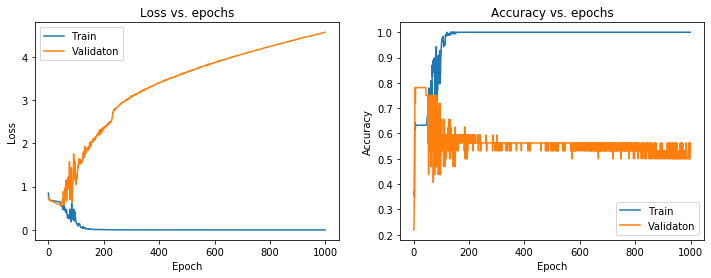

In [57]:
# Plot the training and validation loss
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,4))

# Loss plot
ax = fig.add_subplot(121)
ax.plot(history.history['loss'], label="Train")
ax.plot(history.history['val_loss'], label="Validaton")
ax.set_title('Loss vs. epochs')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.legend()

# Accuracy plot
ax = fig.add_subplot(122)
ax.plot(history.history['binary_accuracy'], label="Train")
ax.plot(history.history['val_binary_accuracy'], label="Validaton")
ax.set_title('Accuracy vs. epochs')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
ax.legend()


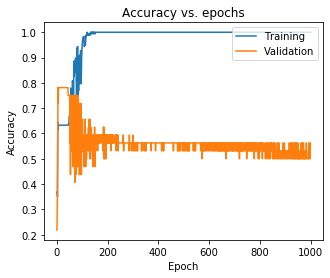

In [49]:
# Plot the training and validation accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [34]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_x,test_y)

50/50 [==============================] - 0s 180us/sample - loss: 0.8173 - binary_accuracy: 0.3400


original shape:  (1000, 1500, 3)
new shape:  (1, 12288)
[[6.3087115e-05]]
your L-layer model predicts a "non-cat" picture.


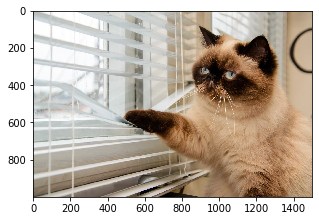

In [232]:
import imageio
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean

my_image = "chat1.jpg" # change this to the name of your image file 
fname = "images/" + my_image
im = imageio.imread(fname, as_gray=False)
print("original shape: " , im.shape)

image_resized = resize(im, (64, 64),preserve_range=True).reshape((64*64*3,1)).T
image_resized = image_resized/255.
print("new shape: ", image_resized.shape)

my_predicted_image = model.predict(image_resized)
print(my_predicted_image)
if (np.squeeze(my_predicted_image)> 0.5):
    y_hat = 1
else:
    y_hat = 0
    

plt.imshow(im)
print ("your L-layer model predicts a \"" + classes[y_hat].decode("utf-8") +  "\" picture.")